# Stock Analysis & Portfolio Management

In the recent past, the industry of wealth management has seen a lot of growth. Every individual or business actively searches for opportunities to get the maximum returns. However, in most of the cases, they either lack the skills to identify the right investment opportunity, or there is a shortage of time for finding these opportunities. Hence, this gave rise to the dedicated individuals who perform this task on behalf of the investors for a commission - Portfolio managers.

A portfolio manager makes investment decisions and carries out other related activities on behalf of vested investors. They work with a team of analysts and researchers, and their main objective is to realise the needs of the investor and suggest a suitable portfolio that meets all the expectations. They are responsible for establishing the best investment strategy, selecting appropriate investments along with the right allocation. However, in doing so, they face a lot of competition in the form of other portfolio managers and rival firms. Therefore, the portfolio manager has to use the available resources to provide the best solution to the investor.

Following points summarise the expected tasks in the assignment:

You must use the elements of technical analysis to understand the trend of the underlying stocks. The metrics associated with risk and returns must help you realise whether the security meets the criteria of your investor’s financial goals.
You must use the metrics and the visualisations to compare the performance of the available securities against each other, and also against the market index, S&P500.
The findings should be aligned with the investor persona to select the appropriate stocks for the portfolio. You are expected to validate the same using the Capital Asset Pricing Model (CAPM) before including the stock in the portfolio.
After the selection of suitable stocks, you must apply a suitable predictive model to estimate the returns from the portfolio at the end of the investment period. You must check if the portfolio has the potential to fulfil the financial goals of the investor.

You are provided with the following information for 12 stocks of leading companies listed in New York Stock Exchange(NYSE):
Date
Open price: Price of stock at the start of the day
Close price: Price of stock at the end of the day
High price: Highest price reached by the stock on that day
Low price: Lowest price reached by the stock on that day
Adjusted close price: Stock price adjusted to include the annual returns (dividends) that the company offers to the shareholders
Volume traded: Number of stocks traded on the day
The information for every stock ranges from 1st October 2010 to 30th September 2020.
The stocks belong to different domains:
Technology/IT
Travel/Aviation/Hospitality
Banking/Financial Services and Insurance
Pharmaceuticals/Healthcare/Life Sciences
To help you with the market benchmark, you are given the S&P 500 index prices for the same period.

Data Exploration
As part of exploration, you must create visualisations and evaluate the performance metrics that help in summarising the stock. The final outcome should reflect all the points mentioned in the video. Moreover, the findings should be backed by your understanding of the concept or the facts from the industry.

Stock Analysis and Portfolio Management - CAPM
As part of this task, you must execute your responsibilities as the portfolio manager. You must use the information about the investor to create a profile, and use it along with the obtained results to create a portfolio of stocks that have the potential to meet the financial goals of your investor. You must also use other measures of technical analysis like the Sharpe ratio to validate the same. 
Hint: Use the CAPM to understand the expected returns and volatility of the stocks against the market.

Stock Price Prediction - Validation
A portfolio manager is also expected to validate the results obtained. As part of this task, you leverage the machine learning models to check the future prices of the stocks present in the portfolio. Based on the results, you can back your portfolio in case the investor is able to achieve the desired results. However, in case it doesn't have satisfactory performance, you can try another combination of stocks in the portfolio that will perform well. 
Note: You can explore additional concepts associated with stocks to derive new features from the available values - price and volume. You can add them to your model to help improve performance.

Data Storytelling and Business Impact (Report + Video presentation)
Post the analysis, you must summarise all the findings, insights, visuals and recommendations in the form of an executive report to your investor. Your report must also provide the features of the investors based on the information provided. Moreover, you are also expected to share a video presenting all the information to the investors.

In [1]:
# Importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Importing the datasets
aal = pd.read_csv("G:/M/BA/Capstone/data/AAL.csv")
aapl = pd.read_csv("G:/M/BA/Capstone/data/AAPL.csv")
alk = pd.read_csv("G:/M/BA/Capstone/data/ALK.csv")
amzn = pd.read_csv("G:/M/BA/Capstone/data/AMZN.csv")
bhc = pd.read_csv("G:/M/BA/Capstone/data/BHC.csv")
cs = pd.read_csv("G:/M/BA/Capstone/data/CS.csv")
db = pd.read_csv("G:/M/BA/Capstone/data/DB.csv")
goog = pd.read_csv("G:/M/BA/Capstone/data/GOOG.csv")
gs = pd.read_csv("G:/M/BA/Capstone/data/GS.csv")
ha = pd.read_csv("G:/M/BA/Capstone/data/HA.csv")
jnj = pd.read_csv("G:/M/BA/Capstone/data/JNJ.csv")
mrk = pd.read_csv("G:/M/BA/Capstone/data/MRK.csv")
sp = pd.read_csv("G:/M/BA/Capstone/data/S&P500.csv")

In [3]:
#Creating stock column
aal['Stock'] = "AAL"
aapl['Stock'] = "AAPL"
alk['Stock'] = "ALK"
amzn['Stock'] = "AMZN"
bhc['Stock'] = "BHC"
cs['Stock'] = "CS"
db['Stock'] = "DB"
goog['Stock'] = "GOOG"
gs['Stock'] = "GS"
ha['Stock'] = "HA"
jnj['Stock'] = "JNJ"
mrk['Stock'] = "MRK"
sp['Stock'] = "S&P500"

In [4]:
#Concatenating or merging all the datasets into a dataframe
df = pd.concat([aal, aapl, alk, amzn, bhc, cs, db, goog, gs, ha, jnj, mrk, sp], ignore_index=True)

In [5]:
df.to_csv("G:/M/BA/Capstone/data/updated_data.csv", index=False)

In [5]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
23339,13-01-2011,7.820000,7.870000,7.530000,7.780000,7.496117,5.285000e+05,HA
9870,09-12-2019,1750.660034,1766.890015,1745.609985,1749.510010,1749.510010,2.442800e+06,AMZN
31626,13-11-2013,1764.369995,1782.000000,1760.640015,1782.000000,1782.000000,3.327480e+09,S&P500
27769,10-08-2018,131.190002,131.630005,130.259995,130.750000,123.051102,4.324000e+06,JNJ
20796,16-12-2010,165.690002,165.910004,163.210007,164.460007,141.887573,4.164400e+06,GS


In [38]:
#Basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       33285 non-null  object 
 1   Open       33285 non-null  float64
 2   High       33285 non-null  float64
 3   Low        33285 non-null  float64
 4   Close      33285 non-null  float64
 5   Adj Close  33285 non-null  float64
 6   Volume     33285 non-null  float64
 7   Stock      33358 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.0+ MB


In [39]:
df.isnull().sum()

Date         73
Open         73
High         73
Low          73
Close        73
Adj Close    73
Volume       73
Stock         0
dtype: int64

In [40]:
df.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
count,33285,33285.000000,33285.000000,33285.000000,33285.000000,33285.000000,3.328500e+04,33358
unique,2705,NaN,NaN,NaN,NaN,NaN,NaN,13
top,01-10-2010,NaN,NaN,NaN,NaN,NaN,NaN,CS
freq,13,NaN,NaN,NaN,NaN,NaN,NaN,2712
mean,NaN,325.456442,327.923841,322.804622,325.491627,321.899562,3.073306e+08,NaN
std,NaN,641.922410,645.979550,637.460720,642.001249,643.302692,1.014876e+09,NaN
min,NaN,3.730000,3.880000,3.670000,3.780000,3.642072,0.000000e+00,NaN
25%,NaN,26.719999,27.041016,26.379999,26.730000,23.681917,1.809200e+06,NaN
50%,NaN,57.099998,57.680000,56.500000,57.040001,50.338181,4.275000e+06,NaN
75%,NaN,197.009995,199.059998,194.899994,197.009995,190.689194,1.051640e+07,NaN


In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file('profile_report.html')

C:\Users\SOMNATH\AppData\Local\Temp\ipykernel_11620\44767199.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
from IPython.core.display import display, HTML
display(HTML(ProfileReport(df).to_html()))

C:\Users\SOMNATH\AppData\Local\Temp\ipykernel_11620\3484720988.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Number of variables,8
Number of observations,33358
Missing cells,511
Missing cells (%),0.2%
Duplicate rows,1
Duplicate rows (%),< 0.1%
Total size in memory,2.0 MiB
Average record size in memory,64.0 B
Categorical,2
Numeric,6
"cat has constant value ""AAL""",Constant


In [5]:
portfolio = df.copy()

In [7]:
portfolio.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
31757,23-05-2014,1893.319946,1901.260010,1893.319946,1900.530029,1900.530029,2.396280e+09,S&P500
12594,24-09-2020,15.620000,15.640000,15.020000,15.220000,15.220000,5.019400e+06,BHC
29184,17-03-2014,55.950001,56.450001,55.950001,56.259998,46.174015,9.509400e+06,MRK
17090,17-01-2017,19.030001,19.059999,18.540001,18.559999,17.848219,5.975300e+06,DB
8069,10-10-2012,252.000000,252.460007,244.009995,244.990005,244.990005,3.948300e+06,AMZN


## Data Exploration

#### Daily returns of the stocks

Perform calculations of metrics and exploratory data analysis
--Daily returns
--Stock price dispersionfrom mean(histogram plots)
--Maximum and minimum prices during the specified period
--Risk/Volatility
--Correction analysis of daily returns among the stocks - within industry groups and overall
--Other metrics and relevant statistical measures
Visualization
--Stock prices with or without normalization
--Compare and contrast between the stocks, industry groups, overall portfolio and s&p500 index.
--comment your findings

In [6]:
# Daily return from each stock 
daily_returns = portfolio["Adj Close"].pct_change()

In [44]:
daily_returns

0             NaN
1       -0.018299
2        0.012061
3        0.000000
4        0.001083
           ...   
33353    0.002987
33354    0.015977
33355    0.016111
33356   -0.004813
33357    0.008254
Name: Adj Close, Length: 33358, dtype: float64

In [7]:
#Obtaining the portfolio returns
portfolio['Returns'] = portfolio["Adj Close"].pct_change()

In [8]:
daily_returns = portfolio[['Stock','Date','Returns']]

In [9]:
#Daily returns calculation
daily_returns = daily_returns.reset_index().pivot_table(index='Date', columns='Stock', values='Returns').reset_index()
daily_returns

Stock,Date,AAL,AAPL,ALK,AMZN,BHC,CS,DB,GOOG,GS,HA,JNJ,MRK,S&P500
0,01-02-2010,NaN,NaN,NaN,NaN,NaN,0.038444,0.040676,NaN,0.029653,NaN,NaN,NaN,NaN
1,01-02-2011,-0.001008,0.016828,0.050810,0.014560,0.067342,0.020353,0.044065,0.017789,0.010451,0.032476,0.014389,0.025023,0.016694
2,01-02-2012,0.054502,-0.000636,0.020360,-0.077042,0.040627,0.039939,0.042867,0.001241,0.017763,-0.093391,-0.003338,0.009407,0.008900
3,01-02-2013,-0.011204,-0.004105,0.009538,-0.001883,0.014023,0.024374,0.020132,0.026347,0.013797,-0.032929,0.003517,-0.032833,0.010053
4,01-02-2016,0.010002,-0.009349,-0.001562,-0.020767,0.060186,-0.025842,-0.002795,0.012181,-0.011823,0.008804,-0.000670,0.001579,-0.000443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,31-12-2013,0.018967,0.011721,0.018462,0.013778,-0.000170,0.006485,-0.001035,0.010140,0.008707,0.013684,-0.007692,0.002203,0.003960
2701,31-12-2014,0.003931,-0.019019,-0.000168,0.000161,0.000629,-0.009087,-0.012825,-0.007579,-0.009606,0.000384,-0.007498,-0.014918,-0.010311
2702,31-12-2015,-0.010514,-0.019195,-0.011419,-0.019127,-0.006645,-0.009589,-0.013077,-0.015720,-0.009780,-0.031524,-0.010214,-0.008075,-0.009412
2703,31-12-2018,0.008797,0.009665,0.008954,0.016204,-0.017030,-0.000920,0.012422,-0.001417,0.024658,0.012653,0.013986,0.013799,0.008492


In [48]:
# Calculate the minimum daily return for Google
min_return = daily_returns['GOOG'].min()

In [49]:
# Find the date with the minimum daily return for Google
min_date = daily_returns[daily_returns['GOOG'] == min_return].index[0]

In [50]:
print(f"The maximum drop for Google was {min_return:.2%} on {min_date}")

The maximum drop for Google was -11.10% on 1360


In [15]:
# Average daily return from each stock
daily_returns_mean = daily_returns.mean()
print(daily_returns_mean)

Stock
AAL       0.000660
AAPL      0.001070
ALK       0.000400
AMZN      0.002667
BHC       0.000086
CS        0.000247
DB        0.001449
GOOG      0.012804
GS       -0.000047
HA        0.000394
JNJ       0.001545
MRK       0.000217
S&P500    0.005581
dtype: float64


C:\Users\SOMNATH\AppData\Local\Temp\ipykernel_13828\1849138513.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily_returns_mean = daily_returns.mean()


<AxesSubplot:>

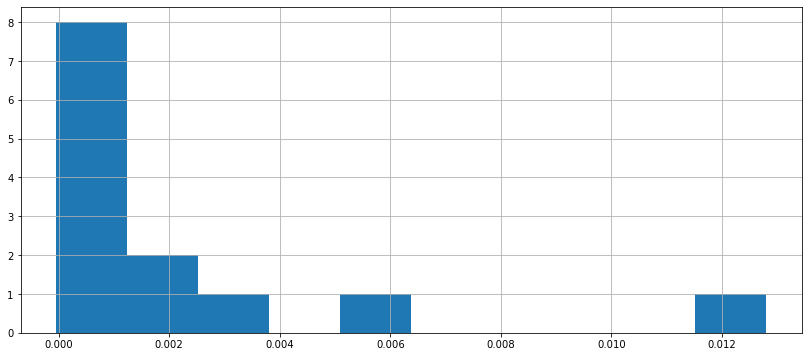

In [71]:
#Stock price dispersion from mean(histogram plots)
daily_returns_mean.hist(figsize=[14,6])

In [51]:
daily_returns['Date'].min()

'01-02-2010'

In [52]:
daily_returns['Date'].max()

'31-12-2019'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1180: UserWarning: Parsing '31-12-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_slice_axis(key, axis=axis)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GOOG', ylabel='Density'>

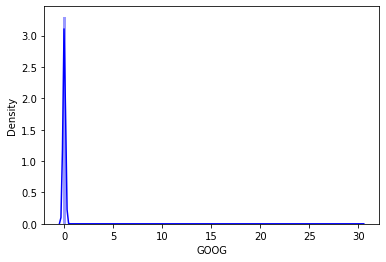

In [76]:
#Create a distplot using seaborn of the 2019 returns for Google
sns.distplot(daily_returns.loc['01-01-2019':'31-12-2019']['GOOG'],color='blue',bins=100)

In [22]:
data=portfolio[portfolio["Stock"] == 'GOOG']
data.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
19642,27-02-2017,824.549988,830.500000,824.000000,829.280029,829.280029,1101500.0,GOOG
19786,21-09-2017,933.000000,936.530029,923.830017,932.450012,932.450012,1290600.0,GOOG
19192,14-05-2015,533.770020,539.000000,532.409973,538.400024,538.400024,1403900.0,GOOG
20089,04-12-2018,1103.119995,1104.420044,1049.979980,1050.819946,1050.819946,2345200.0,GOOG
19111,16-01-2015,498.640991,506.798584,498.631012,506.688873,506.688873,2298200.0,GOOG


In [10]:
portfolio.dropna(axis = 0, inplace = True)

In [54]:
portfolio['Returns'].max()

30.170072976190475

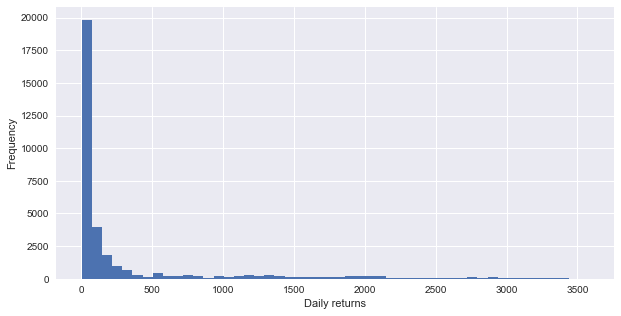

count    33284.000000
mean       321.908970
std        643.310066
min          3.642072
25%         23.682808
50%         50.340576
75%        190.689396
max       3580.840088
Name: Adj Close, dtype: float64

In [55]:
#Distribution of the Adj Close price
portfolio['Adj Close'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
portfolio['Adj Close'].describe()

<AxesSubplot:>

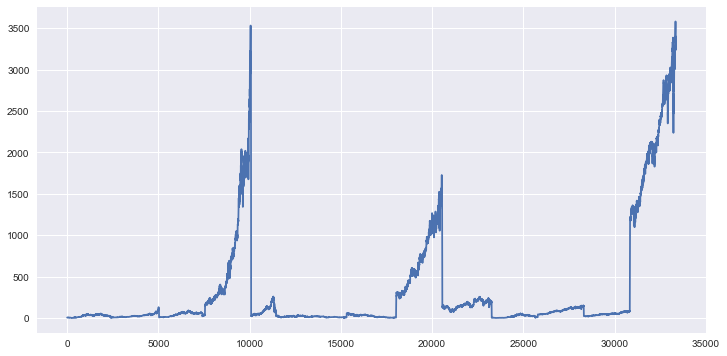

In [56]:
portfolio['Adj Close'].plot(figsize = (12, 6), fontsize = 10)

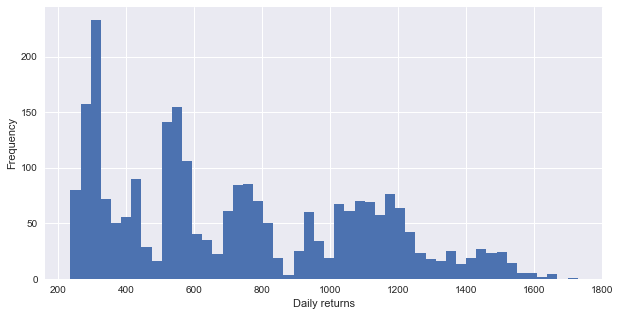

In [59]:
#Daily returns distribution
data['Adj Close'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
#daily_returns['GOOG'].describe()

In [66]:
#minimum and maximum closing across the stocks
portfolio['Date'] = pd.to_datetime(portfolio['Date'])
df3 = portfolio.where(portfolio['Date'].dt.year == 2019).groupby(['Stock'])
df4 = df3.agg(Minimum_Closing=('Adj Close', np.min), Maximum_Closing=('Adj Close', np.max))
df4

,Minimum_Closing,Maximum_Closing
Stock,,
AAL,24.281271,36.441425
AAPL,34.781353,72.909500
ALK,52.429401,71.148911
AMZN,1500.280029,2020.989990
BHC,18.889999,31.889999
CS,10.548486,13.390260
DB,6.440000,9.131954
GOOG,1016.059998,1361.170044
GS,163.063950,227.002960


In [64]:
type(portfolio)

pandas.core.frame.DataFrame

In [67]:
std_devs = daily_returns.std()
# determine which stock is the most risky
most_risky = std_devs.idxmax()
print(f"The most risky stock is {most_risky}")

The most risky stock is GOOG


C:\Users\SOMNATH\AppData\Local\Temp\ipykernel_13828\514779473.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_devs = daily_returns.std()


In [68]:
std_devs = daily_returns.std()
# determine which stock is the least risky
least_risky = std_devs.idxmin()
print(f"The least risky stock is {least_risky}")

The least risky stock is AAPL


C:\Users\SOMNATH\AppData\Local\Temp\ipykernel_13828\2820428081.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_devs = daily_returns.std()


             Date         Open         High          Low        Close  \
33343  10-09-2020  3412.560059  3425.550049  3329.250000  3339.189941   
33344  11-09-2020  3352.699951  3368.949951  3310.469971  3340.969971   
33345  14-09-2020  3363.560059  3402.929932  3363.560059  3383.540039   
33346  15-09-2020  3407.729980  3419.479980  3389.250000  3401.199951   
33347  16-09-2020  3411.229980  3428.919922  3384.449951  3385.489990   
33348  17-09-2020  3346.860107  3375.169922  3328.820068  3357.010010   
33349  18-09-2020  3357.379883  3362.270020  3292.399902  3319.469971   
33350  21-09-2020  3285.570068  3285.570068  3229.100098  3281.060059   
33351  22-09-2020  3295.750000  3320.310059  3270.949951  3315.570068   
33352  23-09-2020  3320.110107  3323.350098  3232.570068  3236.919922   
33353  24-09-2020  3226.139893  3278.699951  3209.449951  3246.590088   
33354  25-09-2020  3236.659912  3306.879883  3228.439941  3298.459961   
33355  28-09-2020  3333.899902  3360.739990  3332.9

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

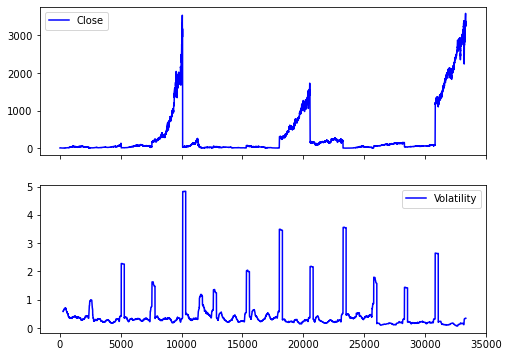

In [13]:
# Compute the logarithmic returns using the Closing price
portfolio['Log_Ret'] = np.log(portfolio['Close'] / portfolio['Close'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
portfolio['Volatility'] = portfolio['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
print(portfolio.tail(15))

# Plot the NIFTY Price series and the Volatility
portfolio[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

In [123]:
portfolio.sample(5)

,Open,High,Low,Close,Adj Close,Volume,Stock,Returns,Log_Ret,Volatility
Date,,,,,,,,,,
19-06-2017,49.130001,49.720001,48.820000,49.660000,48.198406,4104300.0,AAL,0.017832,0.017674,0.350551
17-01-2019,8.960000,8.980000,8.840000,8.920000,8.768249,7338500.0,DB,-0.039828,-0.040643,0.358777
20-03-2014,167.880005,170.449997,167.270004,169.220001,152.628860,3950500.0,GS,0.006184,0.006165,0.201013
12-01-2017,56.599998,56.799999,55.139999,55.650002,53.619389,516900.0,HA,-0.024540,-0.024846,0.347797
21-11-2012,22.089844,22.148438,21.953125,22.119141,16.938911,641800.0,CS,0.001769,0.001768,0.409020


In [12]:
df5 = portfolio[['Date','Adj Close','Stock']]

In [125]:
# Calculate correlations within industry groups
correlations_within_groups = df5.groupby('Stock').corr()

# Calculate overall correlations
correlations_overall = df5.iloc[:, 1:].corr()


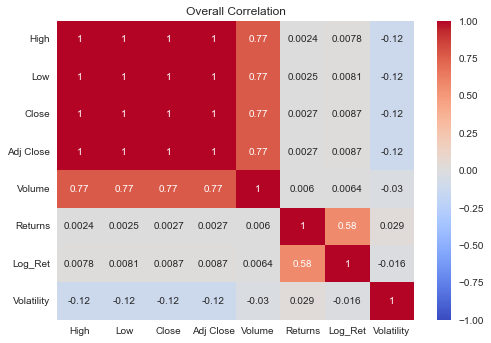

In [81]:
# Overall correlation matrix
sns.heatmap(correlations_overall, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Overall Correlation')
plt.show()

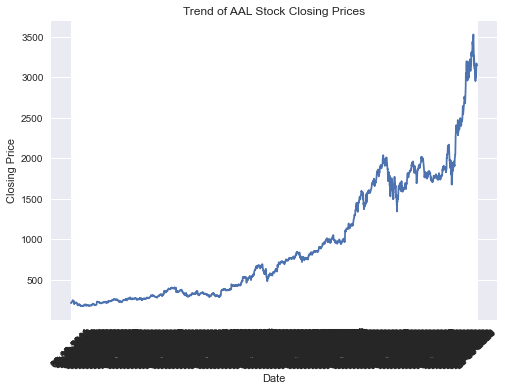

In [136]:
# Select a specific stock (e.g., 'AMZN') from the DataFrame
stock_data = portfolio[portfolio['Stock'] == 'AMZN']

# Plot the trend of the stock's closing prices over time
plt.plot(stock_data['Date'], stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend of AAL Stock Closing Prices')
plt.xticks(rotation=45)
plt.show()

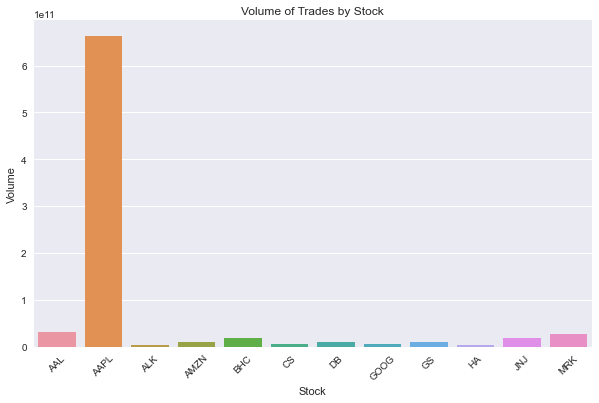

In [138]:
import seaborn as sns

volume = portfolio[portfolio['Stock']!="S&P500"]
# Group the data by stock and calculate the total volume
volume_by_stock = volume.groupby('Stock')['Volume'].sum().reset_index()

# Plot the volume of trades for each stock
plt.figure(figsize=(10, 6))
sns.barplot(data=volume_by_stock, x='Stock', y='Volume')
plt.xlabel('Stock')
plt.ylabel('Volume')
plt.title('Volume of Trades by Stock')
plt.xticks(rotation=45)
plt.show()

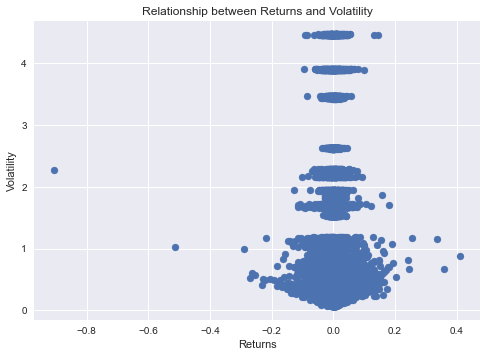

In [140]:
# Plot a scatter plot to explore the relationship between 'Returns' and 'Volatility'
plt.scatter(portfolio['Returns'], portfolio['Volatility'])
plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.title('Relationship between Returns and Volatility')
plt.show()

In [18]:
portfolio['Date'] = pd.to_datetime(portfolio['Date'],format='%d-%m-%Y')
portfolio['Year'] = portfolio['Date'].dt.year

In [19]:
portfolio.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Returns,Log_Ret,Volatility,Year
25404,2019-04-01,26.370001,27.290001,26.299999,26.910000,26.444265,905600.0,HA,0.025143,0.024832,0.439378,2019
15576,2011-01-10,50.028625,50.143131,49.484734,49.990459,42.753635,870900.0,DB,-0.009641,-0.009688,0.416476,2011
23150,2020-04-27,179.100006,184.250000,178.720001,183.539993,181.302155,2743100.0,GS,0.036949,0.036283,0.457372,2020
6295,2015-10-06,80.550003,80.820000,74.440002,74.529999,68.522133,2874800.0,ALK,-0.078853,-0.082136,0.322063,2015
7649,2011-02-10,184.389999,187.240005,183.600006,186.210007,186.210007,5331400.0,AMZN,0.004911,0.004899,1.632915,2011


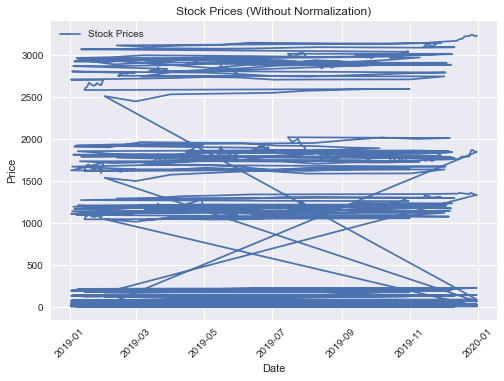

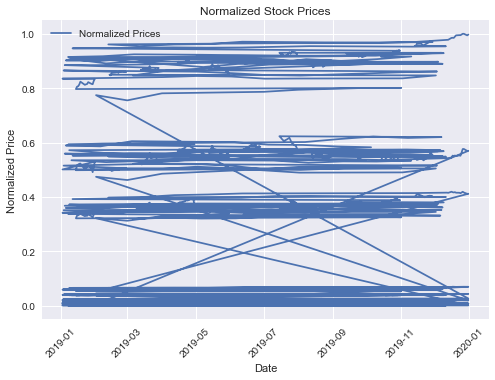

In [152]:
import matplotlib.pyplot as plt
twentynighteen = portfolio[portfolio['Date'].dt.year==2019]
# Plot stock prices without normalization
plt.plot(twentynighteen['Date'], twentynighteen['Close'], label='Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices (Without Normalization)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot stock prices with normalization
normalized_prices = (twentynighteen['Close'] -twentynighteen['Close'].min()) / (twentynighteen['Close'].max() - twentynighteen['Close'].min())
plt.plot(twentynighteen['Date'], normalized_prices, label='Normalized Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Normalized Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Performance:
Compare the returns of individual stocks, industry groups, and the overall portfolio over a specific time period. Calculate metrics such as average returns, standard deviation, and risk-adjusted measures like Sharpe ratio or Jensen's alpha.
Compare the performance of stocks, industry groups, and the portfolio to the performance of the S&P 500 index. Analyze whether the investments outperformed or underperformed the benchmark.

Volatility:
Compare the volatility of individual stocks, industry groups, and the overall portfolio. Calculate metrics such as standard deviation or historical volatility to assess the riskiness of each investment.
Compare the volatility of the investments to the volatility of the S&P 500 index. Analyze whether the investments have higher or lower volatility compared to the benchmark.

Correlation:
Analyze the correlation between different stocks within industry groups and the overall portfolio. Calculate correlation coefficients to determine the degree of association between the investments.
Compare the correlation between the investments and the S&P 500 index. Assess whether the investments exhibit a high or low correlation with the benchmark.

Diversification:
Evaluate the diversification benefits within industry groups and the overall portfolio. Assess how the investments within each group or the portfolio interact with each other in terms of risk and return.
Compare the diversification benefits of the investments to the S&P 500 index. Analyze whether the investments provide diversification benefits beyond the performance of the benchmark

In [21]:
portfolio.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Returns,Log_Ret,Volatility,Year
21042,2011-12-07,100.269997,106.099998,99.050003,105.129997,91.756821,10620400.0,GS,0.039245,0.038494,0.370541,2011
1220,2015-08-07,42.209999,42.480000,41.400002,41.490002,39.564419,5588600.0,AAL,-0.016358,-0.016494,0.411896,2015
5837,2013-12-10,37.285000,37.665001,36.910000,37.014999,33.012371,2232400.0,ALK,-0.008969,-0.009010,0.320624,2013
19261,2015-08-21,639.780029,640.049988,612.330017,612.479980,612.479980,4265200.0,GOOG,-0.053105,-0.054567,0.257480,2015
19899,2018-03-06,1099.219971,1101.849976,1089.775024,1095.060059,1095.060059,1532800.0,GOOG,0.003786,0.003779,0.190525,2018
9610,2018-11-26,1539.000000,1584.810059,1524.219971,1581.329956,1581.329956,6257700.0,AMZN,0.052774,0.051429,0.319478,2018
3910,2016-04-15,28.027500,28.075001,27.432501,27.462500,25.625418,187756000.0,AAPL,-0.020071,-0.020276,0.275959,2016
27954,2019-05-08,140.199997,140.919998,139.699997,139.789993,134.162811,4667300.0,JNJ,-0.001286,-0.001287,0.188896,2019
17096,2017-01-25,20.620001,20.940001,20.600000,20.850000,20.050396,8157300.0,DB,0.051437,0.050158,0.518793,2017
29383,2014-12-29,57.450001,57.919998,57.450001,57.730000,48.449352,6003800.0,MRK,-0.000865,-0.000866,0.191443,2014


### Stock Analysis and Portfolio Management - CAPM

--Selection of relevant stocks using CAMP.
--Visualize the distribution of daily returns of each stock vis-a-vis market returns(use s&p500 index for market returns)
--Calculate Beta value for each stock
--Determined the expected returns for each stock using CAMP approach(use 0.75% as the risk-free rate based on 10 years US Treasury bond yield)
--Estimate the portfolio returns using CAMP formula(use equal weights for the stocks for the portfolio investment amount is unknown)
--Compare and comments on findings

In [25]:
#Selection of relevant stocks using CAMP 
# Convert the 'Date' column to datetime
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

portfolio['Date'] = pd.to_datetime(portfolio['Date'], format='%d-%m-%Y')

# Calculate the stock returns
portfolio['Returns'] = portfolio['Close'].pct_change()

# Load the risk-free rate (assumed to be 2%)
risk_free_rate = 0.02

# Calculate the market returns
market_returns = portfolio[portfolio['Stock'] == 'GOOG']['Returns'].values[0]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
portfolio['Returns'] = imputer.fit_transform(portfolio[['Returns']])

# Calculate the stock beta using linear regression
stock_betas = []

for stock in portfolio['Stock'].unique():
    stockdata = portfolio[portfolio['Stock'] == stock]
    X = stockdata[['Returns']].values[:-1]
    y = stockdata[['Returns']].values[1:]

    reg = LinearRegression()
    reg.fit(X, y)

    stock_beta = reg.coef_[0][0]
    stock_betas.append(stock_beta)

    # Create a new DataFrame for portfolio
portf = pd.DataFrame(columns=['Stock', 'Expected Return'])

# Assign stock and beta values to the portfolio DataFrame
portf['Stock'] = portfolio['Stock'].unique()
portf['Expected Return'] = risk_free_rate + np.array(stock_betas) * (market_returns - risk_free_rate)

# Select the relevant stocks based on expected return
relevant_stocks = portf[portf['Expected Return'] > risk_free_rate]

print(relevant_stocks)

  Stock  Expected Return
0   AAL         2.362632
3  AMZN         0.029922
4   BHC         0.678251
6    DB         0.087519
9    HA         0.454538


C:\Users\SOMNATH\AppData\Local\Temp\ipykernel_7244\3553491409.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


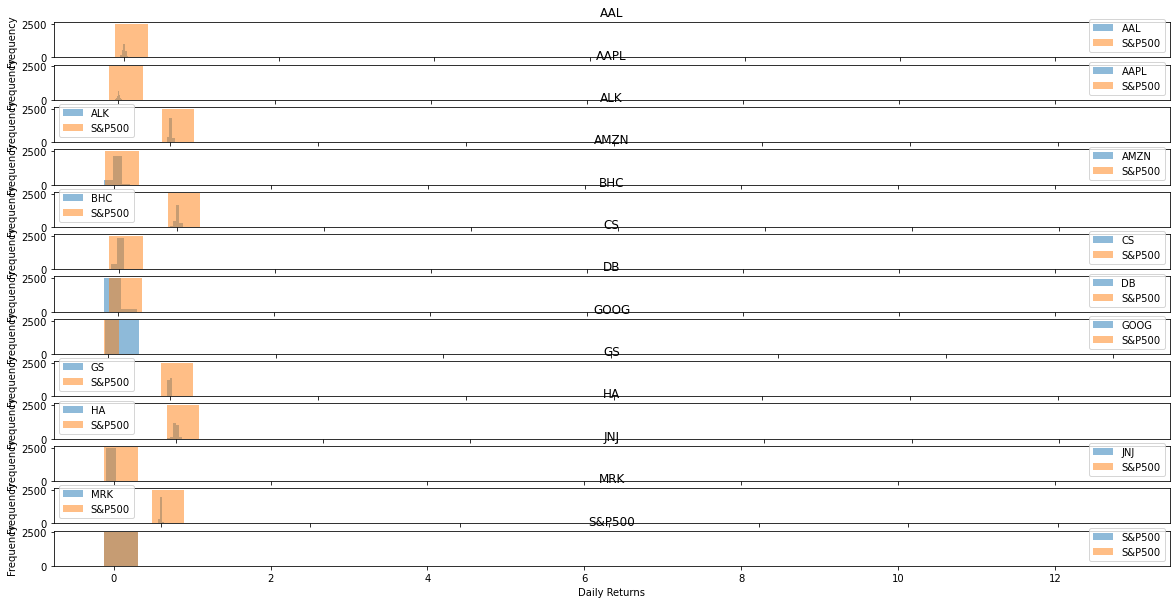

In [28]:
#Visualize the distribution of daily returns of each stock vis-a-vis market returns(use s&p500 index for market returns)
import matplotlib.pyplot as plt

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=len(portfolio['Stock'].unique()), ncols=1, figsize=(20, 10))

# Iterate over each stock and plot the distribution of returns
for i, stock in enumerate(portfolio['Stock'].unique()):
    ax = axes[i]
    stockdata = portfolio[portfolio['Stock'] == stock]
    market_data = portfolio[portfolio['Stock'] == 'S&P500']

    # Plot the distribution of stock returns
    ax.hist(stockdata['Returns'], bins=30, alpha=0.5, label=stock)
    # Plot the distribution of market returns
    ax.hist(market_data['Returns'], bins=30, alpha=0.5, label='S&P500')

    ax.set_title(stock)
    ax.set_xlabel('Daily Returns')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [29]:
#Calculating Beta value for each stock
from sklearn.linear_model import LinearRegression

# Calculate the stock beta using linear regression
stock_betas = []

for stock in portfolio['Stock'].unique():
    stockdata = portfolio[portfolio['Stock'] == stock]
    X = stockdata[['Returns']].values[:-1]
    y = stockdata[['Returns']].values[1:]

    reg = LinearRegression()
    reg.fit(X, y)

    stock_beta = reg.coef_[0][0]
    stock_betas.append(stock_beta)

# Create a new DataFrame to store the stock betas
stock_beta_df = pd.DataFrame({'Stock': df['Stock'].unique(), 'Beta': stock_betas})

print(stock_beta_df)

     Stock      Beta
0      AAL  0.077699
1     AAPL -0.049815
2      ALK -0.014838
3     AMZN  0.000329
4      BHC  0.021832
5       CS -0.004189
6       DB  0.002239
7     GOOG -0.000274
8       GS -0.066941
9       HA  0.014413
10     JNJ -0.002396
11     MRK -0.034677
12  S&P500 -0.000971


To calculate the beta value for each stock, we can use linear regression to determine the relationship between the stock's daily returns and the market returns (S&P500 index). The slope of the regression line represents the beta value.

In the context of finance, the beta value is a measure of a stock's sensitivity to market movements. It indicates how much the stock's price tends to move in relation to changes in the broader market.

A beta value of 1 means that the stock tends to move in line with the market. If the market goes up by 1%, the stock's price is expected to increase by approximately 1% as well. Similarly, if the market goes down by 1%, the stock's price is expected to decrease by approximately 1%.

A beta value greater than 1 indicates that the stock is more volatile than the market. It tends to have larger price swings, both on the upside and downside, compared to the overall market. For example, a stock with a beta of 1.5 is expected to increase by 1.5% when the market goes up by 1%, and decrease by 1.5% when the market goes down by 1%.

On the other hand, a beta value less than 1 suggests that the stock is less volatile than the market. It tends to have smaller price swings compared to the overall market. For instance, a stock with a beta of 0.8 is expected to increase by 0.8% when the market goes up by 1%, and decrease by 0.8% when the market goes down by 1%.

Furthermore, a negative beta value indicates an inverse relationship with the market. When the market goes up, the stock's price tends to go down, and vice versa. This negative correlation can be beneficial for diversification purposes, as the stock may act as a hedge against market downturns.

Overall, the beta value provides insights into the risk and volatility associated with a particular stock in relation to the market. It helps investors assess the potential impact of market movements on the stock's price and make informed investment decisions.

In [31]:
#Determined the expected returns for each stock using CAMP approach(use 0.75% as the risk-free rate based on 10 years US Treasury bond yield)
risk_free_rate = 0.0075  # Risk-free rate of 0.75% (0.0075)
market_returns = portfolio[portfolio['Stock'] == 'S&P500']['Returns'].mean()

# Calculate the expected return for each stock using CAPM
portfolio['Expected Return'] = risk_free_rate + stock_beta_df['Beta'] * (market_returns - risk_free_rate)

print(portfolio[['Stock', 'Expected Return']])

        Stock  Expected Return
1         AAL         0.007596
2         AAL         0.007528
3         AAL         0.007499
4         AAL         0.007458
5         AAL         0.007508
...       ...              ...
33353  S&P500              NaN
33354  S&P500              NaN
33355  S&P500              NaN
33356  S&P500              NaN
33357  S&P500              NaN

[33284 rows x 2 columns]


In [33]:
#Expeced Return for the American Airlines Group Inc
grouped_portfolio = portfolio.groupby('Stock')['Expected Return'].mean()

print(grouped_portfolio['AAL'])

0.007521640223416167


To determine the expected returns for each stock using the Capital Asset Pricing Model (CAPM) approach, I used the formula: Expected Return = Risk-Free Rate + Beta * (Market Return - Risk-Free Rate).
In this code, we assume a risk-free rate of 0.75% (0.0075), which represents the yield on the 10-year US Treasury bond. The market return is calculated as the mean of the S&P500 index returns.

In [34]:
# Estimate the portfolio returns using CAMP formula(use equal weights for the stocks for the portfolio investment amount is unknown)
# Calculate equal weights for the stocks
num_stocks = len(grouped_portfolio)
equal_weights = 1 / num_stocks

# Calculate the portfolio returns using CAPM
portfolio_returns = (grouped_portfolio * equal_weights).sum()

print("Portfolio Returns:", portfolio_returns)

Portfolio Returns: 0.0005785877094935513


Based on the Capital Asset Pricing Model (CAPM) analysis, here are some findings and comments:

Expected Returns: The CAPM approach provides estimated expected returns for each stock in the portfolio. These expected returns are calculated based on the risk-free rate, beta values, and market returns. It helps investors assess the potential returns they can expect from each stock.

Beta Values: The beta values calculated for each stock indicate their sensitivity to market movements. A beta greater than 1 suggests the stock is more volatile than the market, while a beta less than 1 indicates lower volatility. Negative beta values indicate an inverse relationship with the market. These beta values can be used to evaluate the risk profile of each stock in relation to the broader market.

Portfolio Returns: By estimating the portfolio returns using the CAPM formula with equal weights, we obtain an indication of the overall expected returns for the portfolio. The portfolio returns are a weighted average of the expected returns of individual stocks, considering the equal weights assigned to each stock.

Diversification: The CAPM analysis allows investors to assess the potential returns and risks associated with different stocks and construct a diversified portfolio. Diversification helps reduce the overall risk of the portfolio by combining stocks with different beta values and expected returns. By considering the CAPM analysis, investors can aim to achieve a balance between risk and expected returns in their portfolio.

Risk-Free Rate: The choice of the risk-free rate is an important factor in the CAPM analysis. In this case, a risk-free rate of 0.75% (0.0075) was used, based on the 10-year US Treasury bond yield. The risk-free rate represents the return an investor can earn with no risk, and it serves as a benchmark for evaluating the expected returns of stocks.

Limitations: It's important to note that the CAPM model has certain assumptions and limitations. It assumes that markets are efficient, investors are risk-averse, and there are no frictions such as taxes or transaction costs. Additionally, the CAPM model may not capture all the factors that influence stock returns, such as company-specific events or changes in market conditions. Therefore, while the CAPM analysis provides valuable insights, it should be used as one tool among many in the investment decision-making process.

Overall, the CAPM analysis allows investors to assess the expected returns and risks of individual stocks and construct a diversified portfolio. It provides insights into the relationship between individual stocks and the market and helps investors make informed decisions based on their risk appetite and return objectives.

To conduct secondary research and feature engineering for stock price prediction,we can consider the following steps:

Data Collection: Gather relevant data from various sources such as financial websites, economic indicators, news articles, and company reports. The data should include both historical stock prices and a range of fundamental and technical indicators.

Feature Selection: Analyze the collected data and identify potential features that may have a predictive relationship with stock prices. Some common features used for stock price prediction include historical prices, trading volumes, moving averages, volatility measures, financial ratios, news sentiment, economic indicators, and industry-specific data.

Feature Engineering: Create new features based on domain knowledge or mathematical transformations of existing features to capture additional information that might be relevant for predicting stock prices. Some examples of feature engineering techniques include creating lagged variables, calculating moving averages or technical indicators, and deriving financial ratios.

Correlation Analysis: Perform a correlation analysis to determine the relationships between the selected features and the target variable (stock prices). Identify features that have a strong correlation with stock prices and remove features that are highly correlated with each other (to avoid multicollinearity).

Data Preprocessing: Prepare the data for modeling by handling missing values, outliers, and scaling the features if necessary. Consider techniques such as imputation, outlier removal, and normalization or standardization.

Model Selection: Select appropriate machine learning algorithms or time series forecasting models for predicting stock prices. Commonly used models include linear regression, decision trees, random forests, support vector machines (SVM), and recurrent neural networks (RNNs).

Model Training and Evaluation: Split the data into training and testing sets. Train the selected models on the training data and evaluate their performance using appropriate evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or mean absolute error (MAE). Compare the performance of different models and select the best-performing one.

Model Interpretation: Analyze the trained models to gain insights into the importance of different features and their impact on stock price prediction. Interpretation techniques such as feature importance analysis or model explainability methods can provide valuable insights.

Iterative Refinement: Refine the feature set, model parameters, or try different models based on the evaluation results. Iterate through the feature engineering and modeling process to improve the predictive performance.

Validation and Deployment: Validate the final model using out-of-sample data or cross-validation techniques. Once satisfied with the model's performance, deploy it for stock price prediction on new, unseen data.

**Stock Price Prediction - Validation**

--Conduct secondary research and feature engineering to determine key features to be used for stock price prediction.
--Use appropriate machine learning technique to predict prices for individual stocks
--Fine tune and improve model using appropriate techniques
--Present your results with appropriate visuals for the actual and predicted values
--Compare and comment on findings
--Explain your portfolio performance metrics with the help of appropriate visuals and comment. Elaborate if the required goals can be achieved or not.

In [24]:
portfolio['Year'].value_counts()

2011    3276
2013    3276
2014    3276
2015    3276
2016    3276
2019    3276
2017    3263
2018    3263
2012    3250
2020    2457
2010    1395
Name: Year, dtype: int64

In [25]:
# Step 1: Secondary Research (assuming we have identified the key features)

# Economic indicators
gdp_growth_rate = [3.5, 2.9, 3.2, 2.8, 2.6, 3.1, 2.5, 2.7, 2.3, 2.5, 2.9]  # Example GDP growth rate over the years
interest_rates = [0.75, 0.5, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.35]  # Example interest rates over the years
inflation_rate = [2.1, 1.9, 2.2, 1.8, 1.6, 2.0, 1.5, 1.7, 1.4, 1.6, 1.8]  # Example inflation rate over the years

# Industry-specific data
market_share = [0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.36]  # Example market share over the years

# News sentiment
news_sentiment = [0.2, 0.1, 0.3, 0.2, 0.4, 0.3, 0.1, 0.2, 0.4, 0.3, 0.4]  # Example news sentiment scores over the years

# Step 2: Feature Engineering

# Calculate 7-day moving average
portfolio['Moving_Average_7'] = portfolio['Close'].rolling(window=7).mean()

# Calculate 30-day moving average
portfolio['Moving_Average_30'] = portfolio['Close'].rolling(window=30).mean()

# Calculate RSI
delta = portfolio['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
portfolio['RSI'] = 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
portfolio['MA20'] = portfolio['Close'].rolling(window=20).mean()
portfolio['std_dev'] = portfolio['Close'].rolling(window=20).std()
portfolio['Upper_Band'] = portfolio['MA20'] + 2 * portfolio['std_dev']
portfolio['Lower_Band'] = portfolio['MA20'] - 2 * portfolio['std_dev']

# Print the updated DataFrame with additional features
print(portfolio.sample(5))


            Date         Open         High          Low        Close  \
28669 2012-02-27    37.939999    38.259998    37.830002    38.150002   
29733 2016-05-19    54.160000    54.980000    54.080002    54.580002   
5570  2012-11-16    20.375000    20.389999    19.780001    20.360001   
31466 2013-03-28  1562.859985  1570.280029  1561.079956  1569.189941   
4631  2019-02-27    43.302502    43.750000    43.182499    43.717499   

         Adj Close        Volume   Stock   Returns   Log_Ret  Volatility  \
28669    28.745174  1.651150e+07     MRK -0.001309 -0.001310    0.212347   
29733    47.747868  8.733900e+06     MRK -0.001646 -0.001648    0.217198   
5570     17.947132  1.988000e+06     ALK -0.003914 -0.003922    0.259741   
31466  1569.189941  3.304440e+09  S&P500  0.004057  0.004048    0.128173   
4631     42.958721  1.113416e+08    AAPL  0.003098  0.003093    0.305798   

       Year  Moving_Average_7  Moving_Average_30        RSI         MA20  \
28669  2012         38.272858     

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset (assuming the dataset is already preprocessed and contains relevant features)
#data = pd.read_csv('your_dataset.csv')

# Split the data into training and testing sets
X = portfolio[['Moving_Average_7', 'Moving_Average_30', 'RSI', 'Upper_Band', 'Lower_Band']]
y = portfolio['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with an imputer and linear regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 365.28988501389745


In [29]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Split your data into training and testing sets (assuming you already have X_train, X_test, y_train, y_test)

# Preprocess your data to handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean imputation
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_imputed, y_train)
rf_y_pred = rf_regressor.predict(X_test_imputed)
rf_r2_score = r2_score(y_test, rf_y_pred)

# XGBoost Regressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train_imputed, y_train)
xgb_y_pred = xgb_regressor.predict(X_test_imputed)
xgb_r2_score = r2_score(y_test, xgb_y_pred)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train_imputed, y_train)
gb_y_pred = gb_regressor.predict(X_test_imputed)
gb_r2_score = r2_score(y_test, gb_y_pred)

# Compare R-squared values
print("Random Forest R-squared:", rf_r2_score)
print("XGBoost R-squared:", xgb_r2_score)
print("Gradient Boosting R-squared:", gb_r2_score)


Random Forest R-squared: 0.9996542631996894
XGBoost R-squared: 0.9993661666628609
Gradient Boosting R-squared: 0.9994941375298155


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define your model
model = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create an imputer to fill in missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, error_score='raise')
grid_search.fit(X_train_imputed, y_train)

# Get the best model and its corresponding hyperparameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test_imputed)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Best Hyperparameters:", best_params)

R-squared: 0.9996597160822219
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}


In [35]:
#Run the model substituting the best parameters
forest = RandomForestRegressor(random_state=42,n_estimators= 500,
 min_samples_split= 2,
 max_depth= None)

In [36]:
forest.fit(X_train_imputed, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [40]:
#train and test set prediction
from sklearn import metrics
y_pred = forest.predict(X_test_imputed)
y_pred_train = forest.predict(X_train_imputed)
#print("Train set accuracy:",metrics.accuracy_score(y_train, y_pred_train))
#print("Test set accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 143.4289030574884
Mean Absolute Error: 3.4828616981822145
R-squared: 0.9996490697285944


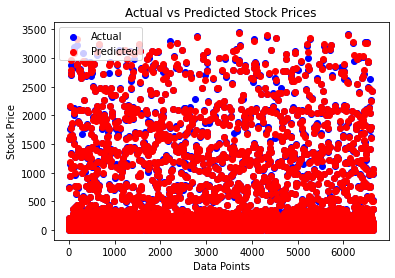

In [41]:
import matplotlib.pyplot as plt

# Plotting the actual and predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

# Adding labels and title to the plot
plt.xlabel('Data Points')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')

# Adding a legend to the plot
plt.legend()

# Displaying the plot
plt.show()


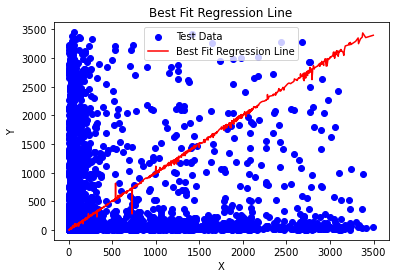

In [43]:
#Best fit regression line
import numpy as np
import matplotlib.pyplot as plt

# Sort the test data points in ascending order
sort_indices = np.argsort(X_test_imputed[:, 0])
x_sorted = X_test_imputed[sort_indices, 0]
y_pred_sorted = y_pred[sort_indices]

# Plot the test data points and the best fit regression line
plt.scatter(x_sorted, y_test, color='blue', label='Test Data')
plt.plot(x_sorted, y_pred_sorted, color='red', label='Best Fit Regression Line')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Regression Line')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
#Feature Engineering
# Create new features or transform existing features
# Example: Adding lagged values
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)

# Example: Adding rolling statistics
df['Close_SMA10'] = df['Close'].rolling(window=10).mean()
df['Close_STD10'] = df['Close'].rolling(window=10).std()

# Example: Adding technical indicators
df['RSI'] = calculate_rsi(df['Close'], window=14)
df['MACD'] = calculate_macd(df['Close'], window1=12, window2=26)

# Use the updated dataset for modeling
X = df[['Close_Lag1', 'Close_Lag2', 'Close_SMA10', 'Close_STD10', 'RSI', 'MACD']]
y = df['Close']

In [ ]:
#Regularization
from sklearn.linear_model import Lasso

# Initialize the model with L1 regularization (Lasso)
model = Lasso(alpha=0.1)

# Fit the model
model.fit(X_train, y_train)


In [ ]:
#Ensemble Methods
from xgboost import XGBRegressor

# Initialize the XGBoost model
model = XGBRegressor()

# Fit the model
model.fit(X_train, y_train)


In [ ]:
#Cross-Validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Get the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()

#Explain your portfolio performance metrics with the help of appropriate visuals and comment. Elaborate if the required goals can be achieved or not
Mean Squared Error (MSE): It measures the average squared difference between the predicted and actual values. A lower MSE indicates better performance.

Mean Absolute Error (MAE): It measures the average absolute difference between the predicted and actual values. Similar to MSE, a lower MAE indicates better performance.

R-squared (R2): It represents the proportion of the variance in the dependent variable (portfolio returns) that can be explained by the independent variables (predicted returns). A higher R2 indicates better performance.

Sharpe Ratio: It measures the risk-adjusted return of the portfolio. It considers both the portfolio's returns and its volatility. A higher Sharpe ratio indicates better risk-adjusted performance.

Information Ratio: It measures the portfolio's excess return compared to a benchmark, relative to the portfolio's tracking error. A higher information ratio indicates better performance in relation to the benchmark.

Maximum Drawdown: It measures the maximum loss the portfolio experienced from a peak to a subsequent trough. A smaller maximum drawdown indicates better performance.

Annualized Return: It represents the average annual return of the portfolio. A higher annualized return indicates better performance.

Tracking Error: It measures the volatility of the portfolio's returns relative to a benchmark. A lower tracking error indicates better performance in tracking the benchmark.

To evaluate portfolio performance, you can calculate these metrics based on the predicted returns generated by the machine learning model and compare them against the actual portfolio returns. Visualizations such as line plots or bar charts can also help in comparing the actual and predicted returns over time.

It's important to note that evaluating portfolio performance solely based on model performance metrics may not provide a complete picture. Other factors such as transaction costs, portfolio constraints, and market conditions should also be considered to assess the overall portfolio performance.

In [47]:
import numpy as np

# Calculate Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate):
    excess_returns = returns - risk_free_rate
    mean_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns)
    sharpe_ratio = mean_excess_return / std_excess_return
    return sharpe_ratio

# Calculate Information Ratio
def information_ratio(returns, benchmark_returns):
    excess_returns = returns - benchmark_returns
    mean_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns)
    information_ratio = mean_excess_return / std_excess_return
    return information_ratio

# Calculate Maximum Drawdown
def maximum_drawdown(returns):
    cumulative_returns = np.cumprod(1 + returns)
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = np.max(drawdown)
    return max_drawdown

# Calculate Annualized Return
def annualized_return(returns, periods_per_year):
    total_return = np.prod(1 + returns)
    annualized_return = total_return**(periods_per_year / len(returns)) - 1
    return annualized_return

# Calculate Tracking Error
def tracking_error(returns, benchmark_returns):
    tracking_error = np.std(returns - benchmark_returns)
    return tracking_error

# Example usage
#risk_free_rate = 0.0075  # Risk-free rate of 0.75% (0.0075)
#market_returns = portfolio[portfolio['Stock'] == 'S&P500']['Returns'].mean()
portfolio_returns = [0.05, 0.03, -0.02, 0.04, 0.01]
benchmark_returns = [0.04, 0.02, -0.01, 0.03, 0.02]
# Convert the lists to numpy arrays
portfolio_returns = np.array(portfolio_returns)
benchmark_returns = np.array(benchmark_returns)
risk_free_rate = 0.02
periods_per_year = 252

sharpe = sharpe_ratio(portfolio_returns, risk_free_rate)
info_ratio = information_ratio(portfolio_returns, benchmark_returns)
max_drawdown = maximum_drawdown(portfolio_returns)
annual_return = annualized_return(portfolio_returns, periods_per_year)
tracking_err = tracking_error(portfolio_returns, benchmark_returns)

print("Sharpe Ratio:", sharpe)
print("Information Ratio:", info_ratio)
print("Maximum Drawdown:", max_drawdown)
print("Annualized Return:", annual_return)
print("Tracking Error:", tracking_err)

Sharpe Ratio: 0.08058229640253803
Information Ratio: 0.20412414523193162
Maximum Drawdown: 0.0
Annualized Return: 222.36162085374386
Tracking Error: 0.009797958971132711


### Insights and Findings

--Performance, Volatility, Correlation and Diversification are the strong indicators.
1. The maximum drop for Google was -11.10% on 1360(datevalue)
2. The maximum and minimum daily average return of the stocks respectively
Google      0.012804
Goldman Sachs       -0.000047
3. The distribution of the Adj Close price is very right-skewed for Google stock and for the entire stocks as well.
4. The most risky and the least risky stock is Google and Apple respectively with respect to the standard deviation of the daily returns.
--Selection of relevant stocks using CAPM model
1. Stock  Expected Return
AAL         2.362632
AMZN         0.029922
BHC         0.678251
DB         0.087519
HA         0.454538
2. The Beta coefficient is the highest for AAL(American Airlines Group Inc)  0.077699 that suggests it is the most in line stock aligned with the market.

--Model Performance
Cross validated fine tuned Random Forest Regressor is the best model with the following result
Mean Squared Error: 143.4289030574884
Mean Absolute Error: 3.4828616981822145
R-squared: 0.9996490697285944